In [72]:
## Task 4 SimpleImputer
### This notebook outlines the usage of Simple Imputer (Univariate Imputation).
### Simple Imputer substitutes missing values statistics (mean, median, ...)
#### Dataset: [https://github.com/subashgandyer/datasets/blob/main/heart_disease.csv]

**Demographic**
- Sex: male or female(Nominal)
- Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

**Behavioral**
- Current Smoker: whether or not the patient is a current smoker (Nominal)
- Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

**Medical(history)**
- BP Meds: whether or not the patient was on blood pressure medication (Nominal)
- Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
- Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
- Diabetes: whether or not the patient had diabetes (Nominal)

**Medical(current)**
- Tot Chol: total cholesterol level (Continuous)
- Sys BP: systolic blood pressure (Continuous)
- Dia BP: diastolic blood pressure (Continuous)
- BMI: Body Mass Index (Continuous)
- Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
- Glucose: glucose level (Continuous)

**Predict variable (desired target)**
- 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

In [73]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

### Read the csv data into a pandas dataframe and display the first 5 samples

In [125]:
data_set = pd.read_csv("heart_disease.csv")
data_set.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


### How many Categorical variables in the dataset?

### How many Missing values in the dataset?
Hint: df.Series.isna( ).sum( )

In [126]:
data_set.isna( ).sum( )

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

### Bonus: Visual representation of missing values

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(data_set.isna(), cbar=False, cmap='viridis', yticklabels=False)

### Import SimpleImputer

In [ ]:
from sklearn.impute import SimpleImputer 
mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

### Create SimpleImputer object with 'mean' strategy

In [106]:
heartdisease_imputer = mean_imputer.fit_transform(data_set)

pd.read_csv("heart_disease.csv")

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


### Split data into dependent (y) and independent (X) variables 
Hint: TenYearCHD is the target

In [107]:
X = data_set.iloc[:,:13].values
y = data_set["TenYearCHD"].values

### Fit the imputer model on dataset to calculate statistic for each column

In [108]:
mean_imputer = mean_imputer.fit(X,y)
print(X,y)


[[  1.    39.     4.   ... 106.    70.    26.97]
 [  0.    46.     2.   ... 121.    81.    28.73]
 [  1.    48.     1.   ... 127.5   80.    25.34]
 ...
 [  0.    48.     2.   ... 131.    72.    22.  ]
 [  0.    44.     1.   ... 126.5   87.    19.16]
 [  0.    52.     2.   ... 133.5   83.    21.47]] [0 0 0 ... 0 0 0]


### Trained imputer model is applied to dataset to create a copy of dataset with all filled missing values from the calculated statistic using transform( ) 

In [109]:
Xtrans = mean_imputer.transform(X)
Xtrans

array([[  1.  ,  39.  ,   4.  , ..., 106.  ,  70.  ,  26.97],
       [  0.  ,  46.  ,   2.  , ..., 121.  ,  81.  ,  28.73],
       [  1.  ,  48.  ,   1.  , ..., 127.5 ,  80.  ,  25.34],
       ...,
       [  0.  ,  48.  ,   2.  , ..., 131.  ,  72.  ,  22.  ],
       [  0.  ,  44.  ,   1.  , ..., 126.5 ,  87.  ,  19.16],
       [  0.  ,  52.  ,   2.  , ..., 133.5 ,  83.  ,  21.47]])

### Sanity Check: Whether missing values are filled or not

In [110]:
data_set.isnull()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4234,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4235,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4236,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


### Let's try to visualize the missing values.
##### Hint: Heatmap needs a DataFrame and not a Numpy Array

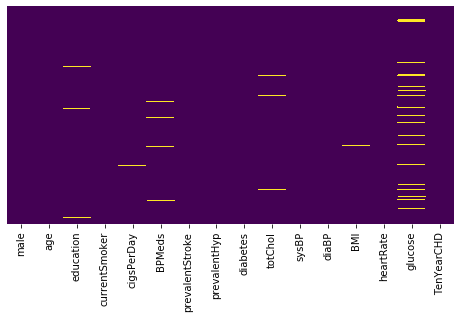

In [111]:
plt.figure(figsize=(8,4))
sns.heatmap(data_set.isnull(), cbar=False, cmap='viridis', yticklabels=False)

In [112]:
from sklearn.model_selection import train_test_split

### Split the dataset into train and test data

In [113]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.05, random_state=0)

# Build a Logistic Regression model with SimpleImputer Mean Strategy

In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test =  sc.transform(X_test)
print (X_train[0:10, :])

[[ 1.16082809e+00  6.33720511e-01 -9.57207831e-01 -9.93562696e-01
  -7.57682912e-01 -1.77212022e-01 -7.74403093e-02  1.49369999e+00
   6.08121140e+00 -1.27374230e+00  1.90827242e+00  1.44448810e+00
   2.50611514e-01]
 [ 1.16082809e+00 -6.78768429e-02 -9.57207831e-01  1.00647901e+00
   9.22460555e-01 -1.77212022e-01 -7.74403093e-02  1.49369999e+00
  -1.64440920e-01  7.37101625e-01  1.29174343e+00  1.99164791e+00
   1.10766202e+00]
 [-8.61453995e-01 -1.47107155e+00  2.11937134e-02 -9.93562696e-01
  -7.57682912e-01 -1.77212022e-01 -7.74403093e-02 -6.69478483e-01
  -1.64440920e-01 -1.16202875e+00 -1.51688864e+00 -2.00682763e+00
  -8.04784964e-01]
 [-8.61453995e-01  1.45225076e+00 -9.57207831e-01 -9.93562696e-01
  -7.57682912e-01 -1.77212022e-01 -7.74403093e-02 -6.69478483e-01
  -1.64440920e-01  1.11505738e-01  2.18526296e-01 -6.59972709e-01
   1.15173890e+00]
 [-8.61453995e-01 -4.18675520e-01  9.99595258e-01 -9.93562696e-01
  -7.57682912e-01 -1.77212022e-01 -7.74403093e-02 -6.69478483e-01


### Create a Logistic Regression model

In [115]:
classifier = LogisticRegression(random_state=0)

### Train the model

In [116]:
classifier.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

### Apply the model

In [117]:
y_pred = classifier.predict(X_test)

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

### Find how well the trained model did with testing data

In [118]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print(acc)
print(cm)

NameError: name 'y_pred' is not defined

### Any observations? 